# Object Detection

- Goals
 - Understand variety of object detection methods

#### Class 1 - Template Matching

- Template matching is the simplest form of object detection
- it simply scans a larger image for a provided template by sliding the template target image across the larger image
- The main option that can be adjusted is the comparison method used as the target template is slid across the larger image
- The methods are all some sort of correlation based metric

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
full = cv2.imread('../Data/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

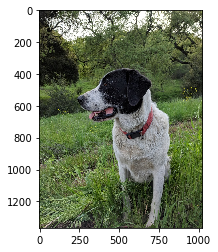

In [3]:
plt.imshow(full)

In [4]:
face = cv2.imread('../Data/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

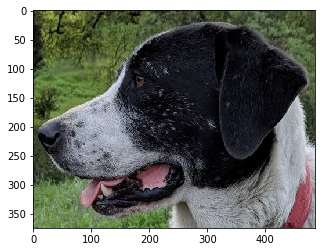

In [5]:
plt.imshow(face)

In [6]:
print('full shape: ',full.shape)
print('face shape: ',face.shape)

full shape:  (1367, 1025, 3)
face shape:  (375, 486, 3)


In [7]:
#comparison methods in string
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR',
          'cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

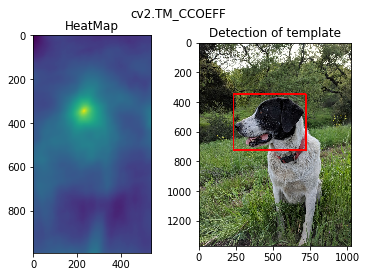

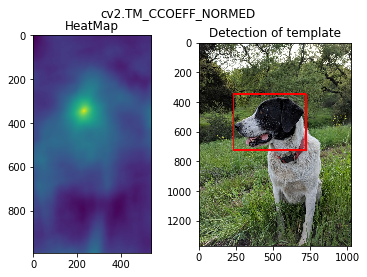

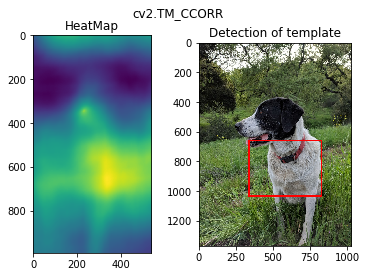

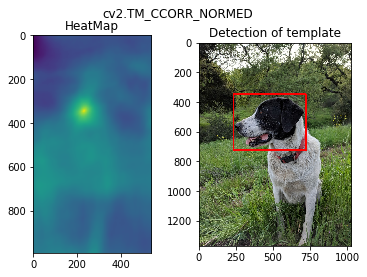

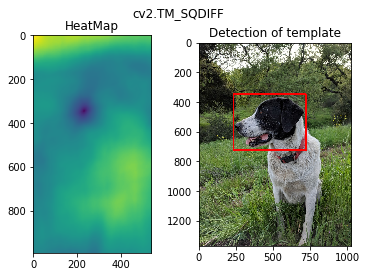

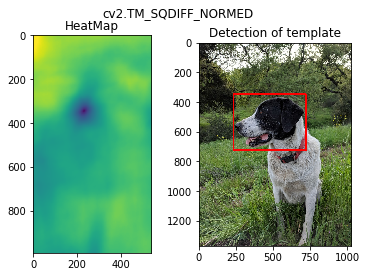

In [8]:
for m in methods:
    #create a copy of the full image
    full_copy = full.copy()
    
    method = eval(m)
    
    #template matching
    res = cv2.matchTemplate(full_copy,face,method)
    #match template output will be a heat map max value at matching places
    #its a reverse process in SQDIFF methods
    
    #take min and max values from res
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    #check for methods and fix the top left corner to draw rectangle
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    #fixing bottom right corner of rectangle
    height,width,channels = face.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)
    
    #draw rectangle
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    #plot 
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HeatMap')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of template')
    
    plt.suptitle(m)
    
    plt.show()
    
    print('\n')

### Class 2 - Corner Detection

- What is Corner?
 - A corner is a point whose local neighbourhood stands in two dominant and different edge directions
 - In other words, corner is a junction of two edges, where an edge is a sudden change in image brightness.
- Corner Detection Algorithms:
 - Harris Corner Detection
 - Shi-Thomas Corner Detection
- Harris Corner Detection:
 - Published in 1988 by Chris Harris and Mike Stephens
 - The basic intuition is that corners can be detected by looking for significant chnage in all directions.
 - Shifting a window/pane in any direction would result in a large change in appearance when window is over a corner portion.
 - Flat regions will have no change in all directions
 - Edges wont have a major change along the direction of the edge
- Shi-Thomas Corner Detection
 - Published in 1994 by J.Shi and C.Thomasi in their paper Good Features to Track.
 - Made a small modification to the Harris Corner Detector.
 - It changes the scoring function selection criteria that Harris uses.
  - Harris: R = lambda1 * lambda2 - k(lambda1 + lambda2)
  - Shit-Thomas : R = min(lambda1,lambda2)
  

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [10]:
flat_chess = cv2.imread('../Data/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

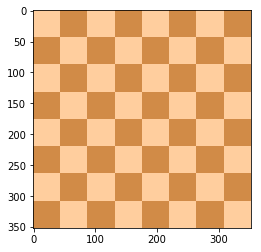

In [11]:
plt.imshow(flat_chess)

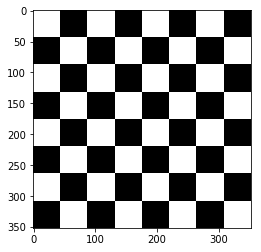

In [12]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_flat_chess,cmap = 'gray')

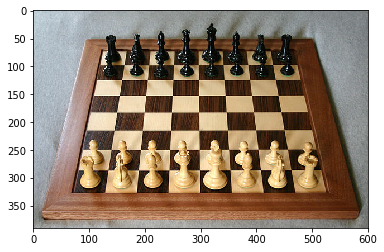

In [13]:
real_chess = cv2.imread('../Data/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

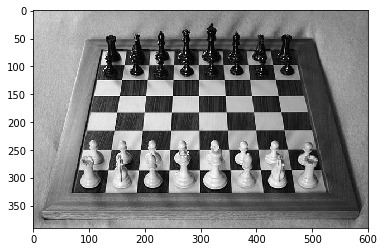

In [14]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_real_chess,cmap = 'gray')

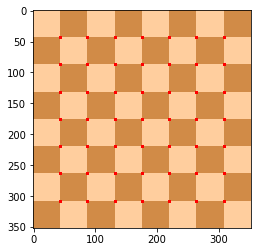

In [15]:
# detecting corners in flat chess board

# convert the image values to float32
gray = np.float32(gray_flat_chess)

#applying Harris Corner detection
dst = cv2.cornerHarris(gray,blockSize = 2,
                      ksize = 3,k = 0.04)

#dilate the destination image
dst = cv2.dilate(dst,None)

# In flat_chess image, if dst>1% of its maximum (dst.max()) 
# change the color for visualization

flat_chess[dst>0.01*dst.max()] = [255,0,0] #RGB channel

plt.imshow(flat_chess)

The outer corner are not detected because it is treated as flat regions

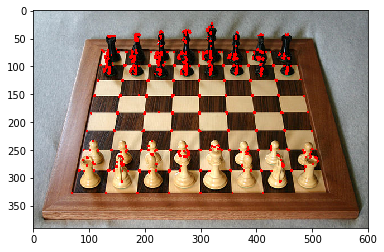

In [16]:
 # detecting corners in real chess board

# convert the image values to float32
gray = np.float32(gray_real_chess)

#applying Harris Corner detection
dst = cv2.cornerHarris(src= gray,blockSize = 2,ksize = 3,k=0.04)

#dilate the destination image
dst = cv2.dilate(dst,None)

# In flat_chess image, if dst>1% of its maximum (dst.max()) 
# change the color for visualization

real_chess[dst>0.01*dst.max()] = [255,0,0] #RGB channel

plt.imshow(real_chess)

#### Class 3 - Shi Thomas Corner Detection

In [17]:
flat_chess = cv2.imread('../Data/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

real_chess = cv2.imread('../Data/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_RGB2GRAY)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_RGB2GRAY)

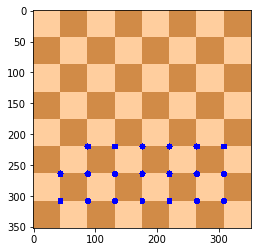

In [18]:
#detecting corners
corners = cv2.goodFeaturesToTrack(gray_flat_chess,20,0.01,10)

#convert to int
corners = np.int0(corners)

#draw circle
for i in corners:
    (x,y) = i.ravel()
    cv2.circle(flat_chess,(x,y),5,(0,0,255),-1)
    
plt.imshow(flat_chess)

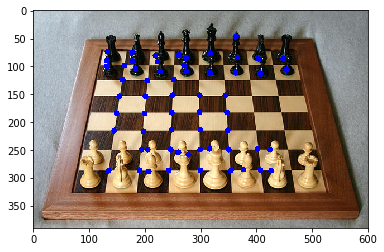

In [19]:
#detecting corners
corners = cv2.goodFeaturesToTrack(gray_real_chess,60,0.01,10)

#convert to int
corners = np.int0(corners)

#draw circle
for i in corners:
    (x,y) = i.ravel()
    cv2.circle(real_chess,(x,y),5,(0,0,255),-1)
    
plt.imshow(real_chess)

#### Class 4 - Edge Detection

- Canny Edge Detector:
 - developed in 1986 by John Canny and is a multi-stage algorithm
 - Steps:
  - Apply Gaussian filter to smooth the image in order to remove the noise
  - Find the intensity gradients of the image
  -  Apply non-maximum suprression to get rid of spurious response to edge detection
  - Apply double threshold to determine potential edges
  - Track edge by hysteresis: Finalize the detection of edges that are weak and not connected to strong edges.
 - A canny algorithm also requires a user to decide on low and high threshold values

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

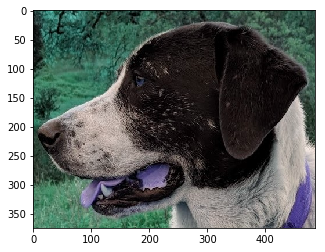

In [21]:
img = cv2.imread('../Data/sammy_face.jpg')
plt.imshow(img)

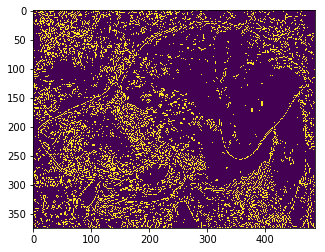

In [22]:
edges = cv2.Canny(img,127,127)
plt.imshow(edges)

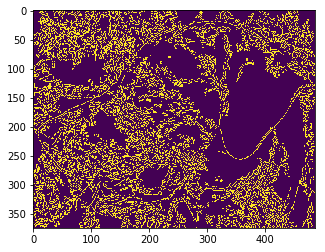

In [23]:
edges = cv2.Canny(img,255,0)
plt.imshow(edges)

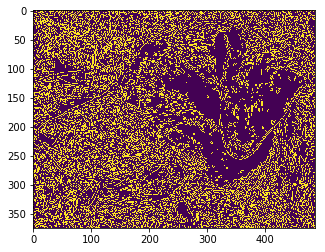

In [24]:
med = np.median(img)

#lower threshold will be either zero or 70% of the median, whichever is greater
lower = int(max(0,0.7*med))

#upper threshold will be either 255 or 30%more (1.3) of the median, whichever is lower
upper = int(min(255,1.3 * med))

edges = cv2.Canny(img,lower,upper)
plt.imshow(edges)

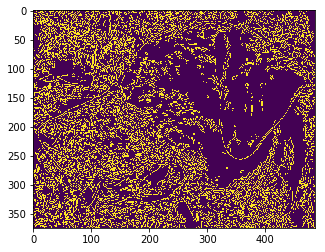

In [25]:
edges = cv2.Canny(img,lower,upper+75)
plt.imshow(edges)

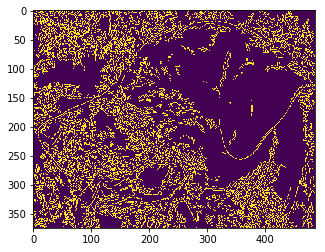

In [26]:
edges = cv2.Canny(img,lower,upper+150)
plt.imshow(edges)

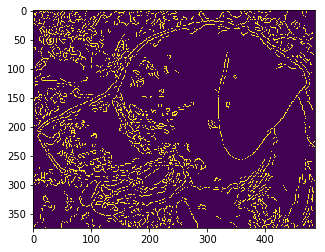

In [27]:
#blurring techniques

blurred_img = cv2.blur(img,(5,5))

edges = cv2.Canny(blurred_img,lower,upper)
plt.imshow(edges)

- you can observe better edge detections after blurring

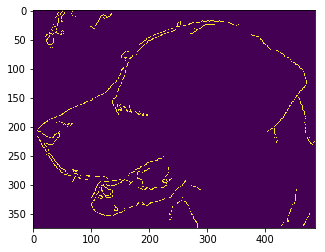

In [28]:
edges = cv2.Canny(blurred_img,lower,upper+130)
plt.imshow(edges)

#### Class 5 - Grid Detection

- Often cameras can create a distortion in an image, such as radial distortion and tangential distortion
- A good way to account for these dstortions when perfoemning operations like object tracking is to have a recognizable pattern attached to the object being tracked.

In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

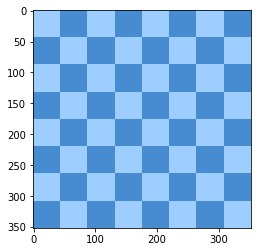

In [30]:
flat_chess = cv2.imread('../Data/flat_chessboard.png')
plt.imshow(flat_chess)

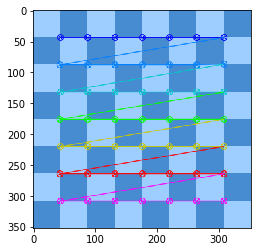

In [31]:
# find chess board corners and draw on them
found,corners = cv2.findChessboardCorners(flat_chess,(7,7))

# draw corners
plt.imshow(cv2.drawChessboardCorners(flat_chess,(7,7),corners,found))

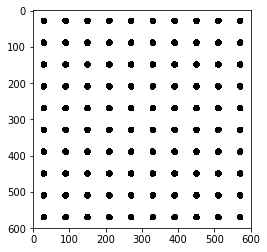

In [32]:
dot_grid = cv2.imread('../Data/dot_grid.png')
plt.imshow(dot_grid)

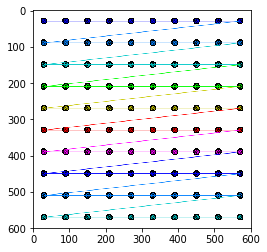

In [33]:
# finding dots in above image
found,corners = cv2.findCirclesGrid(dot_grid,(10,10),cv2.CALIB_CB_SYMMETRIC_GRID)

#draw
plt.imshow(cv2.drawChessboardCorners(dot_grid,(10,10),corners,found))

#### Class 6 - Contour Detection

- Contours are defined as simply a curve joining all the continous points, having same color or intensity
- Contours are useful tool for shape analysis and object detection and recognition

In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

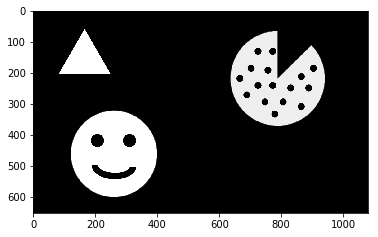

In [35]:
img = cv2.imread('../Data/internal_external.png',0)
plt.imshow(img,cmap='gray')

In [36]:
# finding contours
image,contours,hierarchy = cv2.findContours(img,cv2.RETR_CCOMP,
                                           cv2.CHAIN_APPROX_SIMPLE)

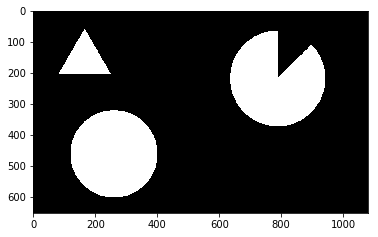

In [37]:
#take external contours
external_contours = np.zeros(img.shape)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours,contours,i,255,-1)
plt.imshow(external_contours,cmap='gray')

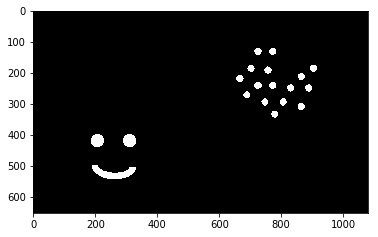

In [38]:
#take internal contours
internal_contours = np.zeros(img.shape)

for i in range(len(contours)):
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(internal_contours,contours,i,255,-1)
plt.imshow(internal_contours,cmap='gray')

#### Class 7 - Feature Matching (Part 1)

- extracts defining key features from an input image(using corner,edge and contour ideas)
- Then using a distance calculation, finds all the matches in a secondary image
- Three different Methods:
 - Brute-Force matching with ORB Desciptors
 - Brute-Force matching with SIFT descriptors and ratio test
 - FLANN based matcher

In [39]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [40]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

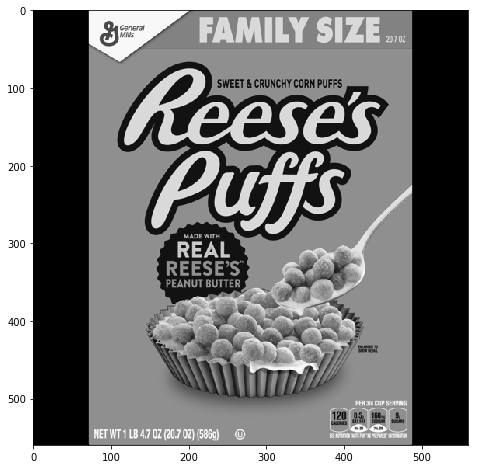

In [41]:
reeses = cv2.imread('../Data/reeses_puffs.png',0)
display(reeses)

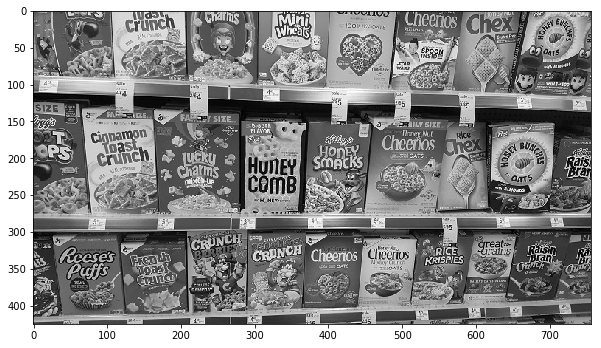

In [42]:
cereals = cv2.imread('../Data/many_cereals.jpg',0)
display(cereals)

In [43]:
#brute force with orb
orb = cv2.ORB_create()

In [44]:
#detect and compute key points
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [45]:
#matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck = True)

In [46]:
matches = bf.match(des1,des2)

In [47]:
#sort them as per the match distance
matches = sorted(matches,key = lambda x:x.distance)

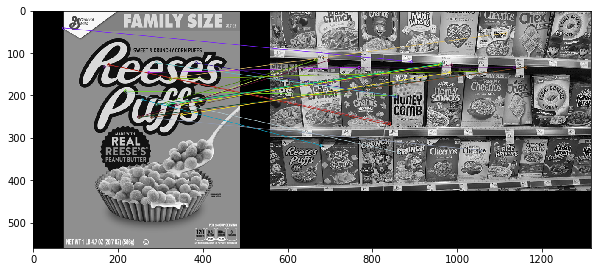

In [48]:
reeses_match = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],
                              None,flags = 2)
display(reeses_match)

- You can observe BF ORB is not good in matching for this case

#### Class 8 - Feature Matching(part 2)

- SIFT descriptors

In [49]:
sift = cv2.xfeatures2d.SIFT_create()

In [50]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [51]:
bf = cv2.BFMatcher()

In [52]:
matches = bf.knnMatch(des1,des2,k=2)

In [53]:
good = []

for match1,match2 in matches:
    
    #lesser the distance -good match
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

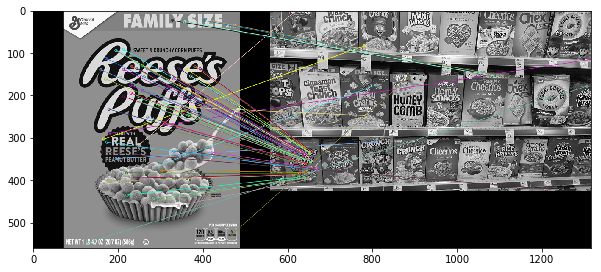

In [54]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,
                                  None,flags =2)
display(sift_matches)

###### FLANN Based matcher

In [55]:
sift = cv2.xfeatures2d.SIFT_create()

In [56]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [57]:
# FLANN - Fast library for approximate nearest neighbours

In [58]:
# flann is faster , good matcher not necessarily the best

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE,tress = 5)
search_params = dict(checks = 50)

In [59]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [60]:
matches = flann.knnMatch(des1,des2,k=2)

In [63]:
matchesMask = [(0,0) for i in range(len(matches))]

In [64]:
# good = []

for i,(match1,match2) in enumerate(matches):
    
    #lesser the distance -good match
    if match1.distance < 0.75*match2.distance:
        matchesMask[i] = [1,0]
#         good.append([match1])

In [65]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor = (255,0,0),
                  matchesMask=matchesMask,flags=0)

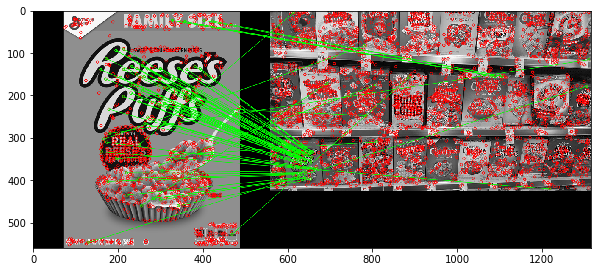

In [67]:
# flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,
#                                   None,flags =2)
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,
                                  None,**draw_params)
display(flann_matches)

#### Class 9 Watershed Algorithm

- Any grayscale image can be viewed as a topographic surface where high intensity denotes peaks and hills while low intensity denotes valleys
- The algorithm can then fill every isolated valleys(local minima) with different colored water(labels)
- This algorithm is especially useful for segmenting images into background and foreground in situations that are difficult for other algorithms.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [69]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

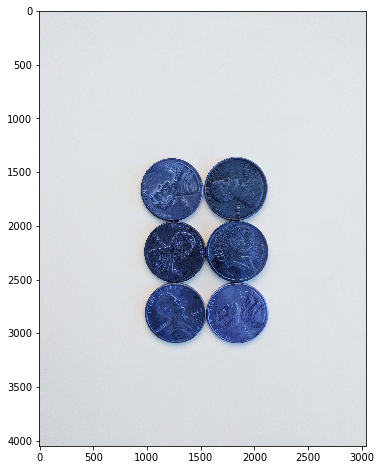

In [70]:
sep_coins = cv2.imread('../Data/pennies.jpg')
display(sep_coins)

#### segmenting using threshold and contour methods

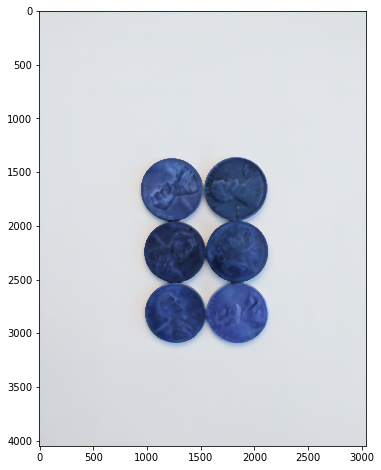

In [75]:
#apply median bur to the image
blur_sep_coins = cv2.medianBlur(sep_coins,ksize=25)
display(blur_sep_coins)

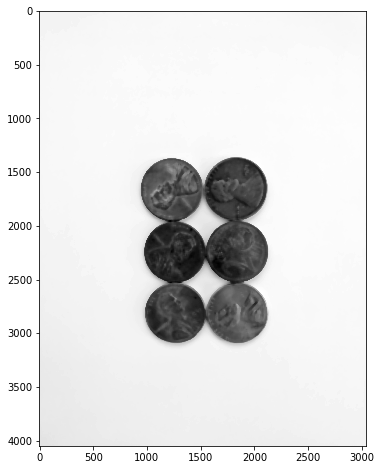

In [76]:
#convert to grayscale
gray_sep_coins = cv2.cvtColor(blur_sep_coins,cv2.COLOR_BGR2GRAY)
display(gray_sep_coins)

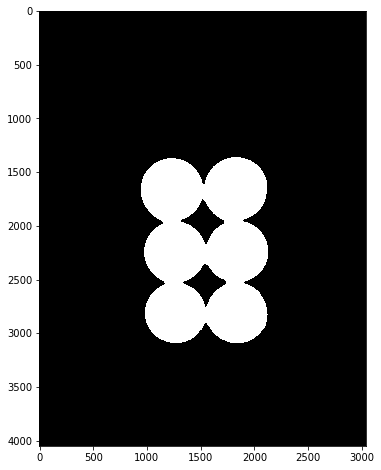

In [79]:
# Binary threshold to grayscale image
ret,thre = cv2.threshold(gray_sep_coins,158,255,cv2.THRESH_BINARY_INV)
display(thre)

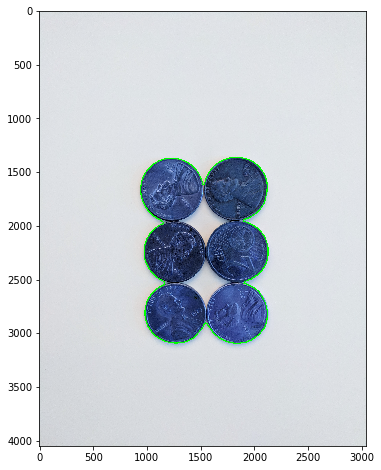

In [81]:
#find and draw contours
image,contours,hierarchy = cv2.findContours(thre.copy(),cv2.RETR_CCOMP,
                                            cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(0,255,0),10)
display(sep_coins)

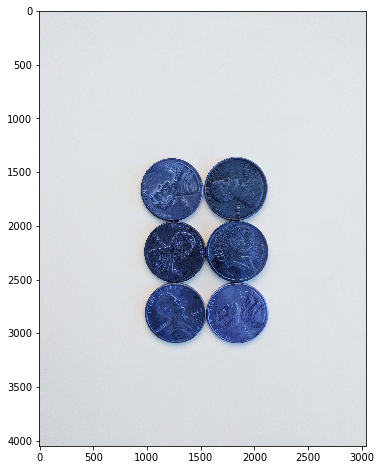

In [82]:
img = cv2.imread('../Data/pennies.jpg')
display(img)

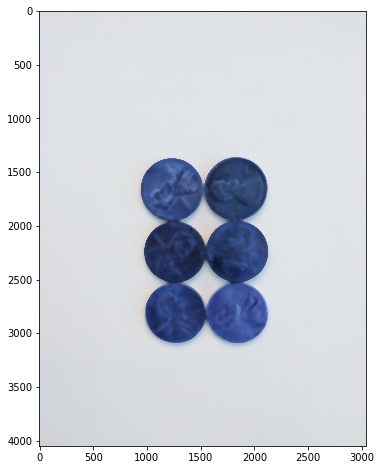

In [83]:
#adding heavy blur for water shead
blur = cv2.medianBlur(img,35)
display(blur)

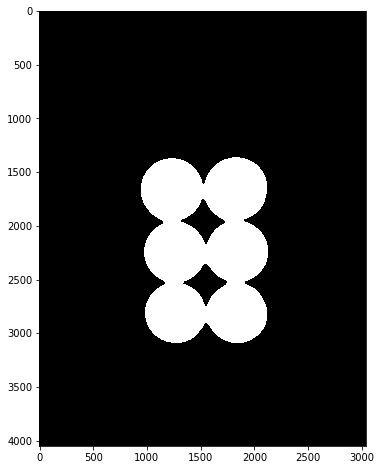

In [106]:
#convert to grey
gray_img = cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)

# apply threshold 
# ret,thre = cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY_INV)
ret,thre = cv2.threshold(gray_img,127,255,
                         cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thre)

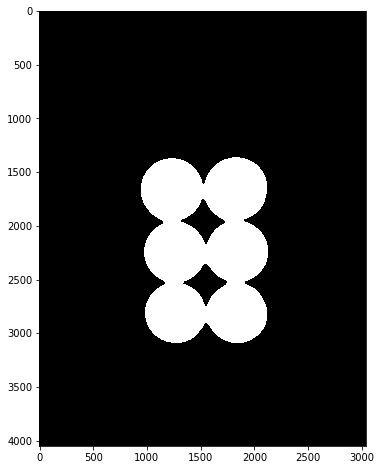

In [90]:
## noise removal(optional)

kernel = np.ones((3,3),dtype=np.uint8)

opening = cv2.morphologyEx(thre,cv2.MORPH_OPEN,kernel,iterations =2)
display(opening)

- Even after all trials you can see that the coins are touching each other, so when you are clear about the foreground information (like 6 coins in this case) try applying distance transform method

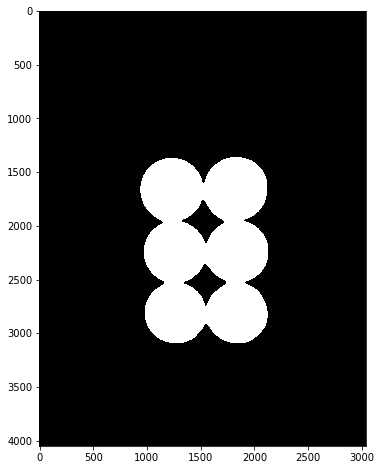

In [107]:
sure_bg = cv2.dilate(opening,kernel,iterations = 3)
display(sure_bg)

In [108]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

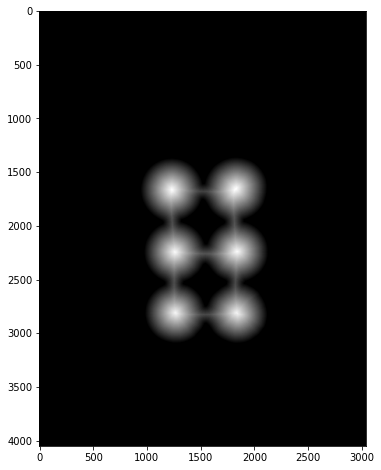

In [109]:
display(dist_transform)

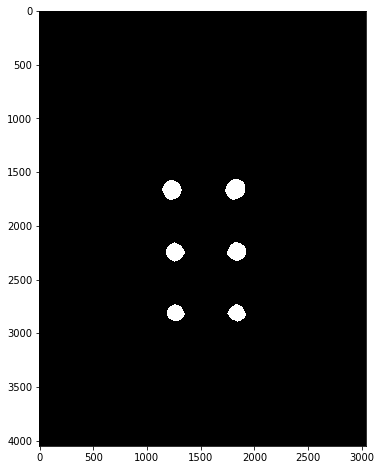

In [110]:
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max()
                            ,255,0)
display(sure_fg)

In [97]:
# find the unknown region

sure_fg = np.uint8(sure_fg)

In [98]:
unknown = cv2.subtract(sure_bg,sure_fg)

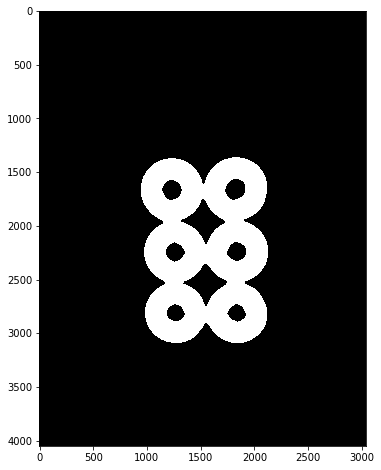

In [99]:
display(unknown)

In [100]:
ret,markers = cv2.connectedComponents(sure_fg)

In [101]:
markers = markers + 1

In [102]:
markers[unknown==255] = 0

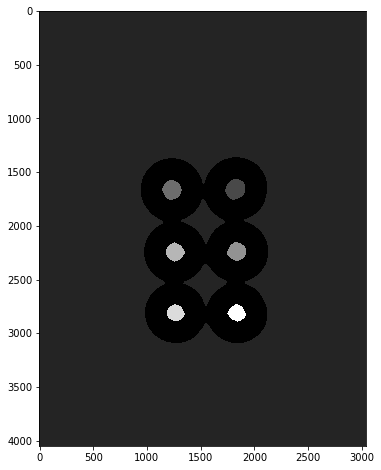

In [103]:
display(markers)

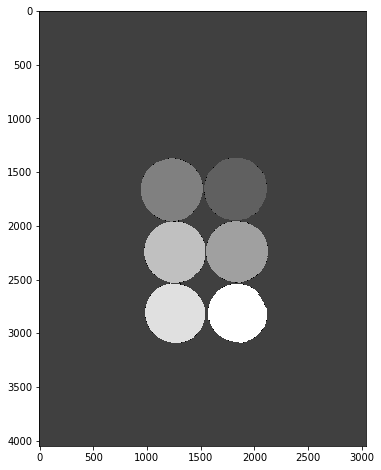

In [104]:
markers = cv2.watershed(img,markers)
display(markers)

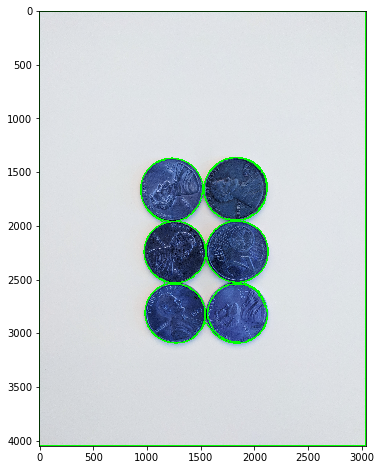

In [105]:
#find and draw contours
image,contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,
                                            cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(0,255,0),10)
display(sep_coins)

#### Custom seeds with Watershed Algorithm

In [2]:
road = cv2.imread('../Data/road_image.jpg')

In [3]:
road_copy = road.copy()

In [4]:
marker_image = np.zeros(road.shape[:2],dtype=np.int32)

In [5]:
segments = np.zeros(road.shape,dtype=np.uint8)

In [6]:
from matplotlib import cm

In [7]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3]) * 255)

In [8]:
colors = []
for i in range(10):
    colors.append(create_rgb(i))

In [9]:
# Global variable

n_markers = 10

#color choice
current_marker = 1

#markers updated by watershed
marks_updated = False

In [10]:
#Callback function
def mouse_callback(event,x,y,flags,params):
    global marks_updated
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(marker_image,(x,y),5,(current_marker),-1)

        #User sees on the ROAD IMAGE
        cv2.circle(road_copy,(x,y),5,colors[current_marker],-1)

        marks_updated = True

In [11]:
# While true
cv2.namedWindow('t')
cv2.setMouseCallback('t',mouse_callback)

while True:
    cv2.imshow('Watershed segments',segments)
    cv2.imshow('t',road_copy)
    
    #close all the windows
    k = cv2.waitKey(1)
    
    if k == 27:
        break
        
    #clearing all the colors upon pressing C key
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2],dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
    
    #update color choice
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))
    
    #update markings
    
    if marks_updated:
        marker_image_copy = marker_image.copy()
        cv2.watershed(road,marker_image_copy)
        
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy==(color_ind)] = colors[color_ind]

cv2.destroyAllWindows()

#### Class 10 - Face detection

- Viola-Jones Face Detection
- This is face detection not face recognition
- In 2001 Paul Viola and Michale Jones came up with the idea of precomputing an integral image to save time on claculations
- Main Feature types:
 - Edge features
 - Line Features
 - Four rectangle features

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [9]:
nadia = cv2.imread('../Data/Nadia_Murad.jpg',0)
denis = cv2.imread('../Data/Denis_Mukwege.jpg',0)
solvay = cv2.imread('../Data/solvay_conference.jpg',0)

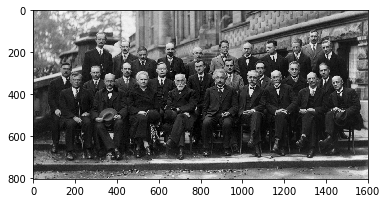

In [10]:
plt.imshow(solvay,cmap='gray')

In [11]:
face_cascade = cv2.CascadeClassifier('../Data/haarcascades/haarcascade_frontalface_default.xml')

In [12]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),10)
        
    return face_img

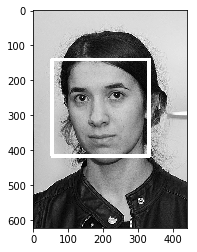

In [13]:
result = detect_face(nadia)
plt.imshow(result,cmap='gray')

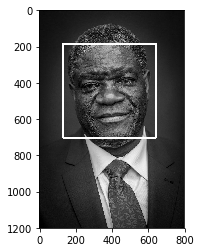

In [21]:
result = detect_face(denis)
plt.imshow(result,cmap='gray')

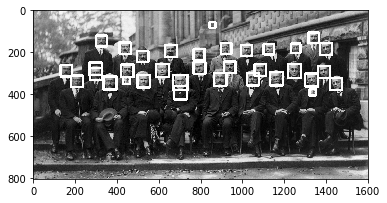

In [22]:
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

In [23]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,
                                               scaleFactor = 1.2,
                                              minNeighbors = 5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),10)
        
    return face_img

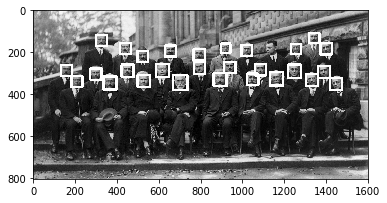

In [24]:
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

In [25]:
eye_cascade = cv2.CascadeClassifier('../Data/haarcascades/haarcascade_eye.xml')

In [27]:
def detect_eyes(img):
    face_img = img.copy()
    eye_rects = eye_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),10)
        
    return face_img

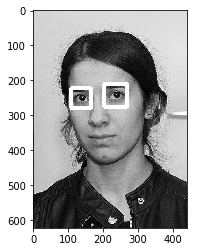

In [28]:
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

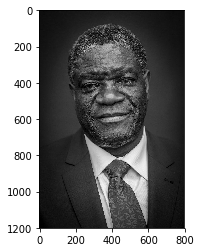

In [29]:
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')

In [15]:
cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read(0)
    frame = detect_face(frame)
    cv2.imshow('Video',frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
        
cap.release
cv2.destroyAllWindows()